<a href="https://colab.research.google.com/github/sensei-jirving/Online-DS-PT-01.24.22-cohort-notes/blob/main/Week_09/Lecture_01/SOLUTION_01_24__Mall_Customer_Analysis_with_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
#mount drive and read in data
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQGG95zRf7Hmos7Gx7VqpJmksOos3bgxr73KYfmc8soEnvk_L4rVcNPcUHDpmNMDnRyof6UPlm-DTEp/pub?gid=1011669702&single=true&output=csv')
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Task 1 Use  Kmeans to establish clusters based on just the income and the spending score.  Remember that you must use scaled data for Kmeans.
How many clusters seems optimal?



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
# define the columns you want to use (x is fine, but remember there isn't an x and Y)
x = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
# scale the data
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

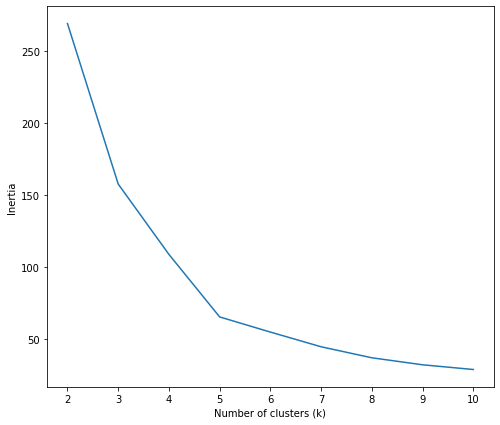

In [ ]:
# define a range of values of k to evaulate for inertia score, fit and run the model, and plot the results
ks = range(2, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(scaled_x)
    inertias.append(model.inertia_)
plt.figure(figsize=(8,7))
plt.plot(ks, inertias)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

Text(0, 0.5, 'Sil Score')

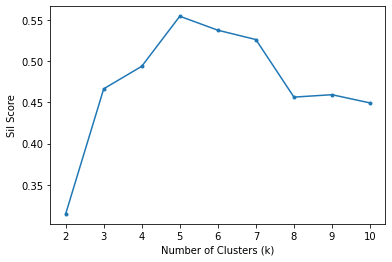

In [ ]:
# define a range of values of k to evaluate for silhouette score, fit and run the model, and plot the results
silhouette_scores = []
for s in ks:
  kmeans = KMeans(n_clusters = s)
  kmeans.fit(scaled_x)
  silhouette_scores.append(silhouette_score(scaled_x,kmeans.labels_))
  
plt.plot(ks, silhouette_scores, marker = '.')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sil Score")

## combining the graphs of inertia and silhouette score

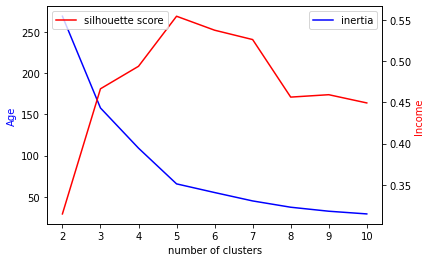

In [ ]:
fig, ax1 = plt.subplots()
  
#color = 'tab:blue'
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('Age', color = 'blue')
ax1.plot(ks, inertias, color = 'blue',label='inertia')
#ax1.tick_params(axis ='y', labelcolor = color)
  
ax2 = ax1.twinx()
  
ax2.set_ylabel('Income ', color = 'red')
ax2.plot(ks, silhouette_scores, color = 'red',label='silhouette score')
#ax2.tick_params(axis ='y', labelcolor = color)
ax1.legend(loc=0)  
ax2.legend(loc='upper left')
#
plt.show()

In [ ]:
# instantiate a Kmeans model with the value for k based on elbow plot method and silhouette score
# Note that both metrics suggested 5 clusters, so that is the K value used here
km = KMeans(n_clusters = 5, random_state = 42)

# add a column to the dataframe to add the cluster lable as you fit and predict x 
df['clusters'] = km.fit_predict(scaled_x)

In [ ]:
df.clusters.value_counts()

0    81
4    39
1    35
2    23
3    22
Name: clusters, dtype: int64

In [ ]:
# examine your dataframe with .head()
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


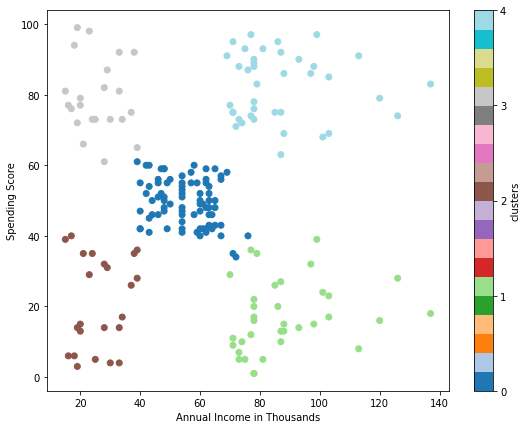

In [ ]:
# Make a scatterplot with these features and color code it based on the cluster.
plt.figure(figsize=(9,7))
plt.scatter(x = df["Annual Income (k$)"], y = df["Spending Score (1-100)"], c = df['clusters'], cmap = 'tab20')

plt.xlabel('Annual Income in Thousands')
plt.ylabel('Spending Score')

cb = plt.colorbar(ticks=[0,1,2,3,4])
cb.set_label('clusters')


In [ ]:
# Investigate each of the clusters. For example: What is the minimum and maximum income for each cluster?

In [ ]:
df.groupby('clusters')['Annual Income (k$)'].describe()

,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,81.0,55.296296,8.988109,39.0,48.00,54.0,62.00,76.0
1,35.0,88.200000,16.399067,70.0,77.50,85.0,97.50,137.0
2,23.0,26.304348,7.893811,15.0,19.50,25.0,33.00,39.0
3,22.0,25.727273,7.566731,15.0,19.25,24.5,32.25,39.0
4,39.0,86.538462,16.312485,69.0,75.50,79.0,95.00,137.0


# Visualize the means of each feature

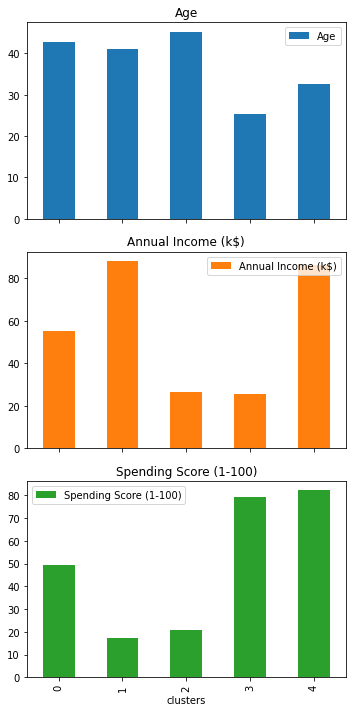

In [ ]:
df.groupby('clusters').mean().plot(subplots=True, kind='bar', figsize=(5,10))
plt.tight_layout()

## Students - Task 2 Use Kmeans to establish clusters based on just the age and the spending score.
How many clusters in optimal?

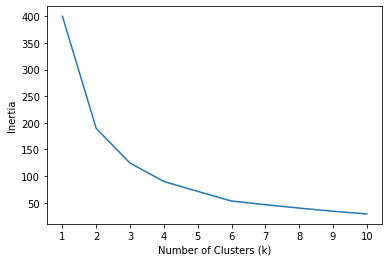

In [ ]:
x = df.loc[:, ['Age', 'Spending Score (1-100)']].values

scaled_x = scaler.fit_transform(x)

ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(scaled_x)
    inertias.append(model.inertia_)

plt.plot(ks, inertias)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

Text(0, 0.5, 'Silhouette Score')

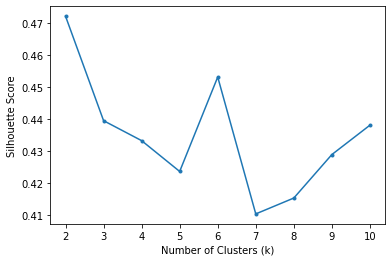

In [ ]:
# define a range of value to try for a silhouette plot, fit and run the model, and plot the results
silhouette_scores = []
for i in range(2,11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_x)
  silhouette_scores.append(silhouette_score(scaled_x, kmeans.labels_))
plt.plot(range(2,11), silhouette_scores, marker = '.')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")

In [ ]:
# Both metrics above suggsted 2 clusters, so that is what is used here
km = KMeans(n_clusters = 2, random_state = 42)
df['clusters'] =km.fit_predict(scaled_x)

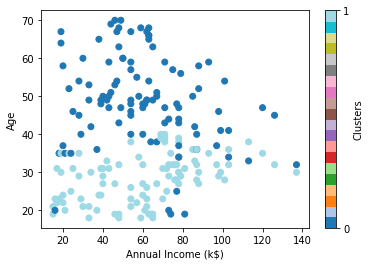

In [ ]:
# Make a scatterplot with these features and color code it based on the cluster
#df.plot(kind = 'scatter', x = "Annual Income (k$)", y = "Age", c = 'clusters', cmap = 'tab20');

plt.scatter(x=df["Annual Income (k$)"],y=df["Age"], c=df['clusters'], cmap = 'tab20')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
cb=plt.colorbar(ticks = [0,1])
cb.set_label('Clusters')

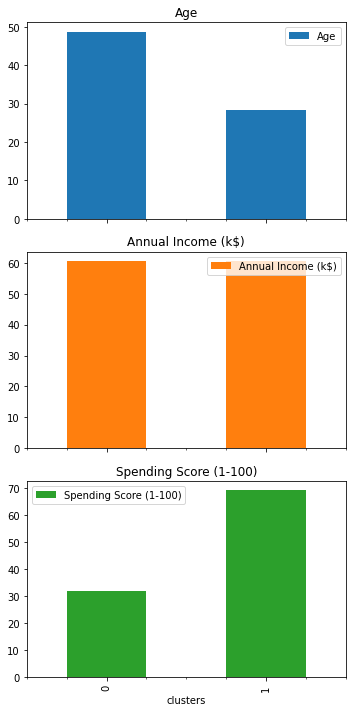

In [ ]:
df.groupby('clusters').mean().plot(subplots=True, kind='bar', figsize=(5,10))
plt.tight_layout()

Task 3 Use Kmeans to establish clusters based on three features: age, income, and spending score. How many clusters is optimal?

In [ ]:
# define the columns you want to use (x is fine, but remember there isn't an x and Y)
x = df.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)', 'Age']].values

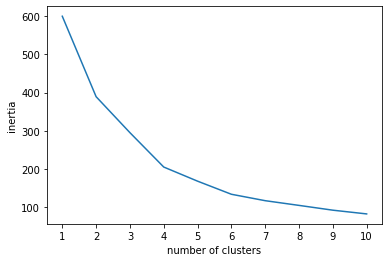

In [ ]:
scaled_x = scaler.fit_transform(x)

ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(scaled_x)
    inertias.append(model.inertia_)

plt.plot(ks, inertias)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Text(0, 0.5, 'Silhouette Score')

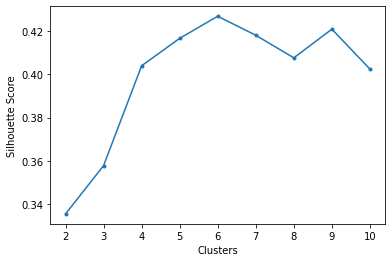

In [ ]:
# Investigate each of the clusters.  For example: What is the minimum and maximum age for each cluster?
# define a range of value to try for a silhoutte plot, fit and run the model, and plot the results
silhouette_scores = []
for i in range(2,11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_x)
  silhouette_scores.append(silhouette_score(scaled_x, kmeans.labels_))
plt.plot(range(2,11), silhouette_scores, marker = '.')
plt.xlabel("Clusters")
plt.ylabel("Silhouette Score")

In [ ]:
# Both metrics above suggsted 6 clusters, so that is what is used here
km = KMeans(n_clusters = 6, random_state = 42)
df['clusters'] =km.fit_predict(scaled_x)

Text(0.5, 0.92, 'Mall Customer Clusters')

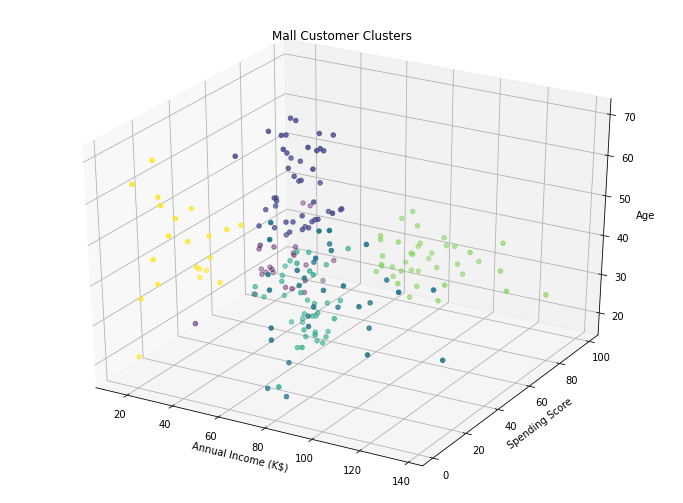

In [ ]:
# Make a 3D scatterplot with these features and color code it based on the clusters
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (12, 9)) # This establishes the size of the graph (try changing  the numbers to see the result)
ax = plt.axes(projection = "3d")

ax.scatter3D(df['Annual Income (k$)'], df['Spending Score (1-100)'], df['Age'], c = df['clusters'])
ax.set_xlabel("Annual Income (K$)")
ax.set_ylabel("Spending Score")
ax.set_zlabel("Age")
plt.title("Mall Customer Clusters")


In [ ]:
# Using plotly 3D graphs 
import plotly.express as px

px.scatter_3d(df, x='Annual Income (k$)',y='Spending Score (1-100)',z='Age',color='clusters')

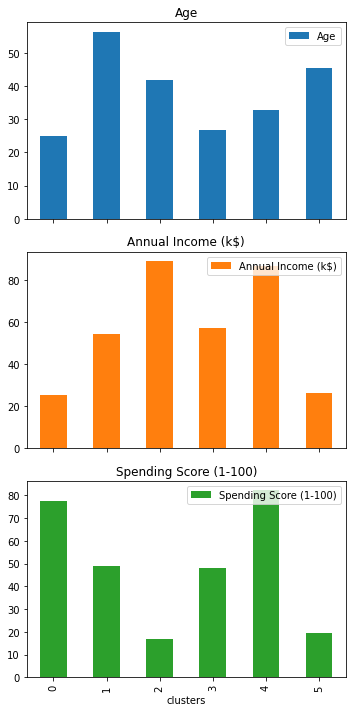

In [ ]:
# Plot the means of each of the clusters.
df.groupby('clusters').mean().plot(subplots=True, kind='bar', figsize=(5,10))
plt.tight_layout()

In [ ]:
# Investigate each of the clusters more deeply.
df.groupby('clusters')['Annual Income (k$)'].describe()

,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,23.0,25.260870,7.723738,15.0,19.0,24.0,31.5,39.0
1,45.0,54.266667,8.975725,38.0,47.0,54.0,62.0,79.0
2,33.0,88.939394,16.586778,71.0,78.0,86.0,98.0,137.0
3,39.0,57.102564,10.161317,39.0,48.0,60.0,64.0,76.0
4,39.0,86.538462,16.312485,69.0,75.5,79.0,95.0,137.0
5,21.0,26.285714,7.437357,16.0,20.0,25.0,33.0,39.0


In [ ]:
df.groupby('clusters')['Spending Score (1-100)'].describe()

,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,23.0,77.608696,13.272457,39.0,73.0,77.0,84.5,99.0
1,45.0,49.066667,6.300794,35.0,45.0,49.0,55.0,60.0
2,33.0,16.969697,9.960813,1.0,10.0,16.0,23.0,39.0
3,39.0,48.128205,9.966205,10.0,42.0,50.0,55.0,61.0
4,39.0,82.128205,9.364489,63.0,74.5,83.0,90.0,97.0
5,21.0,19.380952,12.555780,3.0,6.0,15.0,31.0,40.0


In [ ]:
df.groupby('clusters')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,23.0,25.000000,5.300086,18.0,21.0,23.0,29.5,35.0
1,45.0,56.333333,8.453079,43.0,49.0,54.0,65.0,70.0
2,33.0,41.939394,10.179450,19.0,36.0,43.0,47.0,59.0
3,39.0,26.794872,7.056835,18.0,20.5,26.0,31.5,40.0
4,39.0,32.692308,3.728650,27.0,30.0,32.0,35.5,40.0
5,21.0,45.523810,11.766984,20.0,36.0,46.0,53.0,67.0
